# FInding acuracy, precision,Recall of sqli and sqliv2 datasets


In [1]:
import glob
import time
import pandas as pd

from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')#This tokenizer divides a text into a list of sentences 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item
from nltk.corpus import stopwords #They can safely be ignored without sacrificing the meaning of the sentence
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zobai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zobai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zobai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Dataset reading***

In [1]:
import pandas as pd
import numpy as np
import csv
df = pd.read_csv("mergedsqli.csv")
df

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
37956,syrett,0
37957,arrechea bellveh,0
37958,1664,0
37959,almaluez,0


In [2]:
df['Label'].value_counts()

0    25377
1    12584
Name: Label, dtype: int64

In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
37956,syrett,0
37957,arrechea bellveh,0
37958,1664,0
37959,almaluez,0


In [5]:
df['Label'].value_counts()

0    21533
1    11421
Name: Label, dtype: int64

In [6]:
df.isnull().sum()

Sentence    2
Label       0
dtype: int64

In [7]:
df = df.dropna(how='any',axis=0)

In [8]:
df.isnull().sum()

Sentence    0
Label       0
dtype: int64

In [9]:
x = df.Sentence.values
x

array(['a', "a' ", "a' --", ..., '1664', 'almaluez', 'f6lo40r06'],
      dtype=object)

In [10]:
y = df.Label.values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# spliting dataset

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)



# Data preprocessing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

# Accuracy, Precision, recall function

In [14]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [15]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [16]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

In [17]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    
    return (accuracy,
            precision,
           recall)

# Machine Learning Algorithm :-  MultinomialNB

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
model = MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

In [15]:
x_test = cv.transform(xtest)

In [16]:
model.score(x_test,ytest)

0.9852829616143226

In [17]:
MNB_pred = model.predict(x_test)

In [18]:
MNB_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
MNB_Accuracy=accuracy_score(ytest,MNB_pred)
print(MNB_Accuracy)
#model.fit(x_train, ytrain)

#pred_Mnb = model.predict(xtest)


0.9852829616143226


In [20]:
MNB_precision = precision_score(ytest, MNB_pred)
MNB_recall = recall_score(ytest, MNB_pred)

In [21]:
print('For MultinomialNB:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(MNB_Accuracy,MNB_precision, MNB_recall))

For MultinomialNB:
  Accuracy : 0.9852829616143226 
 Precision : 0.9703098106712564 
 Recall : 0.9877354358300482


In [23]:
# SVM
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,ytrain)
pred_svm=clf.predict(x_test)

In [24]:
SVM_Accuracy=accuracy_score(ytest,pred_svm)
SVM_precision = precision_score(ytest, pred_svm)
SVM_recall = recall_score(ytest, pred_svm)

In [25]:
print('For SVM:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(SVM_Accuracy,SVM_precision, SVM_recall))

For SVM:
  Accuracy : 0.7983614019116978 
 Precision : 1.0 
 Recall : 0.4178712220762155


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,ytrain)
pred_GBR = GBR.predict(x_test)

In [45]:
model_GBR.score(pred_GBR,ytest)

ValueError: Expected 2D array, got 1D array instead:
array=[0.07176235 1.3059901  1.2688444  ... 0.07176235 0.07176235 0.07176235].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
# DT
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train,ytrain)

pred_dt = dt.predict(x_test)

In [27]:
dt_Accuracy=accuracy_score(ytest,pred_dt)
dt_precision = precision_score(ytest, pred_dt)
dt_recall = recall_score(ytest, pred_dt)

In [28]:
print('For Decision Tree:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(dt_Accuracy,dt_precision, dt_recall))

For Decision Tree:
  Accuracy : 0.5996055226824457 
 Precision : 0.4638064253761692 
 Recall : 0.9991239597021463


In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,ytrain)
pred_LR=clf.predict(x_test)


In [30]:
LR_Accuracy=accuracy_score(ytest,pred_LR)
LR_precision = precision_score(ytest, pred_LR)
LR_recall = recall_score(ytest, pred_LR)

In [31]:
print('For Logistic Regression:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(LR_Accuracy,LR_precision, LR_recall))

For Logistic Regression:
  Accuracy : 0.9931725079654073 
 Precision : 0.9960106382978723 
 Recall : 0.9842312746386334


In [48]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 30)
RFC = RFC.fit(x_train,ytrain)
pred_RFC = RFC.predict(x_test)

In [49]:
RFC_Accuracy=accuracy_score(ytest,pred_RFC)
RFC_precision = precision_score(ytest, pred_RFC)
RFC_recall = recall_score(ytest, pred_RFC)

In [50]:
print('For Random Forest:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(RFC_Accuracy,RFC_precision, RFC_recall))

For Random Forest:
  Accuracy : 0.603398573812775 
 Precision : 0.46620379824382274 
 Recall : 1.0


In [60]:
importances = RFC.feature_importances_
importances

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [54]:
indices = np.argsort(importances)
indices

array([16557, 14057, 14059, ..., 10038, 32067, 28266], dtype=int32)

IndexError: row index (27033) out of range

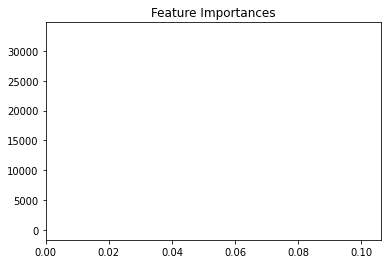

In [56]:
from matplotlib import pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x_train[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(ytest,MNB_pred)

array([[4194,   94],
       [  27, 2276]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print('For Multinomial NB:')
print(classification_report(ytest,MNB_pred))

For Multinomial NB:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4288
           1       0.96      0.99      0.97      2303

    accuracy                           0.98      6591
   macro avg       0.98      0.98      0.98      6591
weighted avg       0.98      0.98      0.98      6591



In [44]:
print('For SVM:')
print(classification_report(ytest,pred_svm))

For SVM:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4288
           1       1.00      0.42      0.59      2303

    accuracy                           0.80      6591
   macro avg       0.88      0.71      0.73      6591
weighted avg       0.84      0.80      0.77      6591



In [45]:
print('For Decision Tree:')
print(classification_report(ytest,pred_dt))

For Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55      4288
           1       0.46      1.00      0.63      2303

    accuracy                           0.59      6591
   macro avg       0.73      0.69      0.59      6591
weighted avg       0.81      0.59      0.58      6591



In [46]:
print('For Logistic Regression:')
print(classification_report(ytest,pred_LR))

For Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4288
           1       0.99      0.98      0.99      2303

    accuracy                           0.99      6591
   macro avg       0.99      0.99      0.99      6591
weighted avg       0.99      0.99      0.99      6591



In [51]:
print('For Rendom Forest:')
print(classification_report(ytest,pred_RFC))

For Rendom Forest:
              precision    recall  f1-score   support

           0       1.00      0.38      0.56      4288
           1       0.47      1.00      0.64      2303

    accuracy                           0.60      6591
   macro avg       0.73      0.69      0.60      6591
weighted avg       0.81      0.60      0.58      6591

